<a href="https://colab.research.google.com/github/MahjabeenTahir/MIDAS/blob/master/Copy_of_Copy_of_midas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/thesis/pyMIDAS/')

In [4]:
from midas import midas
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import os.path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
directory = os.path.dirname(os.path.abspath('/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files'))

In [6]:
df = pd.read_csv('/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [12]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

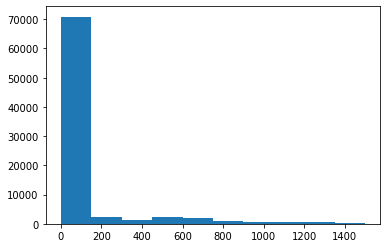

In [9]:
plt.hist(df['dmean'])
plt.show()

In [10]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [11]:
# Must be imported before importing other libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics, neighbors

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files'):
    for filename in filenames:
        if '.csv' in filename:
            print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/NUSW-NB15_features.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/NUSW-NB15_GT.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/UNSW-NB15_3.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/UNSW-NB15_LIST_EVENTS.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/UNSW-NB15_1.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/UNSW-NB15_2.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/UNSW-NB15_4.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv
/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv


In [12]:
def input_train_test():
    root = '../input/data-preprocessing/'
    train = pd.read_csv('/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
    test = pd.read_csv('/content/drive/MyDrive/thesis/pyMIDAS/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')
    
    if train.shape[0] == 82332:
        print("Train and test sets are reversed here. Fixing them.")
        train, test = test, train
    drop_columns = ['attack_cat', 'id']
    for df in [train, test]:
        for col in drop_columns:
            if col in df.columns:
                print('Dropping '+col)
                df.drop([col], axis=1, inplace=True)
    return train, test

train, test = input_train_test()
# test = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
# train = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')

Train and test sets are reversed here. Fixing them.
Dropping attack_cat
Dropping id
Dropping attack_cat
Dropping id


In [13]:
def detection_rate(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    return TP/(TP+FN)

def false_positive_rate(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    return FP/(FP+TN)

def get_xy(df):
    return pd.get_dummies(df.drop(['attack_cat', 'label'], axis=1)), df['label']
def get_train_test(train, test):
    x_train, y_train = get_xy(train)
    x_test, y_test = get_xy(test)

    print("Column mismatch {0}, {1}".format(set(x_train.columns)- set(x_test.columns),  set(x_test.columns)- set(x_train.columns)))
    features = list(set(x_train.columns) & set(x_test.columns))
    print(f"Number of features {len(features)}")
    x_train = x_train[features]
    x_test = x_test[features]
    return x_train, y_train, x_test, y_test

def results(y_test, y_pred):
    print(f"Accuracy {metrics.accuracy_score(y_test, y_pred)*100}, F1-score {metrics.f1_score(y_test, y_pred)*100}")
    # print(metrics.classification_report(y_test, y_pred))
    print("DR {0}, FPR {1}".format(detection_rate(y_test, y_pred)*100, false_positive_rate(y_test, y_pred)*100))

In [14]:
len(train.columns)

43

In [15]:
target = 'label'
x_train, y_train = train.drop([target], axis=1), train[target]
x_test, y_test = test.drop([target], axis=1), test[target]

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [31]:
clf = DecisionTreeClassifier()
clf_1 = GaussianNB()
clf_2 = svm.SVC()

In [32]:
import tensorflow as tf


In [38]:
with tf.device('/gpu:0'):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  results(y_test, y_pred)

Accuracy 86.35038624107273, F1-score 88.53078053559766
DR 95.67854936909909, FPR 25.07837837837838


In [34]:
del x_test['proto']#,'service','state']

In [35]:
del x_test['service']#,'state']

In [37]:
del x_test['state']

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   spkts              175341 non-null  int64  
 2   dpkts              175341 non-null  int64  
 3   sbytes             175341 non-null  int64  
 4   dbytes             175341 non-null  int64  
 5   rate               175341 non-null  float64
 6   sttl               175341 non-null  int64  
 7   dttl               175341 non-null  int64  
 8   sload              175341 non-null  float64
 9   dload              175341 non-null  float64
 10  sloss              175341 non-null  int64  
 11  dloss              175341 non-null  int64  
 12  sinpkt             175341 non-null  float64
 13  dinpkt             175341 non-null  float64
 14  sjit               175341 non-null  float64
 15  djit               175341 non-null  float64
 16  sw

In [ ]:
from midas.anom import midas, midasR

In [ ]:
import math

import numpy as np
from tqdm import tqdm

from midas.edgehash import Edgehash
from midas.nodehash import Nodehash

__all__ = [
    'midas',
    'midasR',
]

def counts_to_anom(tot, cur, cur_t):
    cur_mean = tot / cur_t
    sqerr = np.power(max(0, cur - cur_mean), 2)
    return sqerr / cur_mean + sqerr / (cur_mean * max(1, cur_t - 1))

def getRowInfo(row, anom_score,cur_count,total_count,cur_t):
    cur_src = int(row["src"]) 
    cur_dst = int(row["dst"])
    cur_count.insert(cur_src, cur_dst, 1)
    total_count.insert(cur_src, cur_dst, 1)
    cur_mean = total_count.get_count(cur_src, cur_dst) / cur_t
    sqerr = np.power(cur_count.get_count(cur_src, cur_dst) - cur_mean, 2)
    cur_score = 0 if cur_t == 1 else sqerr / cur_mean + sqerr / (cur_mean * (cur_t - 1))
    cur_score = 0 if math.isnan(cur_score) else cur_score
    anom_score.append(cur_score)

def midas(df, num_rows, num_buckets):
    m = df.src.max()
    cur_count = Edgehash(num_rows, num_buckets, m)
    total_count = Edgehash(num_rows, num_buckets, m)
    anom_score = []
    
    time_df = df.groupby(["timestamp"])
    timestamp_keys =  time_df.groups.keys()
    for timeframe in tqdm(timestamp_keys):
        cur_t = timeframe
        curr_df = time_df.get_group(timeframe)        
        curr_df.apply(lambda row: getRowInfo(row, anom_score,cur_count,total_count,cur_t), axis=1)
        cur_count.clear()
    return anom_score


def midasR(src, dst, times, num_rows, num_buckets, factor):
    m = np.max(src)
    num_entries = src.shape[0]
    cur_count = Edgehash(num_rows, num_buckets, m)
    total_count = Edgehash(num_rows, num_buckets, m)
    src_score = Nodehash(num_rows, num_buckets)
    dst_score = Nodehash(num_rows, num_buckets)
    src_total = Nodehash(num_rows, num_buckets)
    dst_total = Nodehash(num_rows, num_buckets)
    anom_score = np.zeros(num_entries)
    cur_t = 1

    for i in range(num_entries):
        if i == 0 or times[i] > cur_t:
            cur_count.lower(factor)
            src_score.lower(factor)
            dst_score.lower(factor)
            cur_t = times[i]

        cur_src = src[i]
        cur_dst = dst[i]
        cur_count.insert(cur_src, cur_dst, 1)
        total_count.insert(cur_src, cur_dst, 1)
        src_score.insert(cur_src, 1)
        dst_score.insert(cur_dst, 1)
        src_total.insert(cur_src, 1)
        dst_total.insert(cur_dst, 1)

        cur_score = counts_to_anom(
            total_count.get_count(cur_src, cur_dst),
            cur_count.get_count(cur_src, cur_dst),
            cur_t,
        )
        cur_score_src = counts_to_anom(
            src_total.get_count(cur_src), src_score.get_count(cur_src), cur_t
        )
        cur_score_dst = counts_to_anom(
            dst_total.get_count(cur_dst), dst_score.get_count(cur_dst), cur_t
        )
        combined_score = max(cur_score_src, cur_score_dst, cur_score)
        anom_score[i] = np.log(1 + combined_score)

    return anom_score

In [ ]:
import numpy as np


class Edgehash:
    def __init__(self, r, b, m0):
        self.num_rows = r
        self.num_buckets = b
        self.m = m0
        self.hash_a = np.random.randint(low=1, high=b, size=r)
        self.hash_b = np.random.randint(low=0, high=b, size=r)
        self.count = np.zeros((self.num_rows, self.num_buckets))

    def hash(self, a, b, i):
        resid = ((a + self.m * b) * self.hash_a[i] + self.hash_b[i]) % self.num_buckets
        return resid + (self.num_buckets if (resid < 0) else 0)

    def insert(self, a, b, weight):
        for i in range(self.num_rows):
            bucket = self.hash(a, b, i)
            self.count[i][bucket] += weight

    def get_count(self, a, b):
        bucket = self.hash(a, b, 0)
        min_count = self.count[0][bucket]
        for i in range(1, self.num_rows):
            bucket = self.hash(a, b, i)
            min_count = min(min_count, self.count[i][bucket])

        return min_count

    def clear(self):
        self.count = np.zeros((self.num_rows, self.num_buckets))

    def lower(self, factor):
        self.count = self.count * factor

In [ ]:
import numpy as np


class Nodehash:
    def __init__(self, r, b):
        self.num_rows = r
        self.num_buckets = b
        self.hash_a = np.random.randint(low=1, high=b, size=r)
        self.hash_b = np.random.randint(low=0, high=b, size=r)
        self.count = np.zeros((self.num_rows, self.num_buckets))

    def hash(self, a, i):
        resid = (a * self.hash_a[i] + self.hash_b[i]) % self.num_buckets
        return resid + (self.num_buckets if (resid < 0) else 0)

    def insert(self, a, weight):
        for i in range(self.num_rows):
            bucket = self.hash(a, i)
            self.count[i][bucket] += weight

    def get_count(self, a):
        bucket = self.hash(a, 0)
        min_count = self.count[0][bucket]
        for i in range(1, self.num_rows):
            bucket = self.hash(a, i)
            min_count = min(min_count, self.count[i][bucket])

        return min_count

    def clear(self):
        self.count = np.zeros((self.num_rows, self.num_buckets))

    def lower(self, factor):
        self.count = self.count * factor

In [ ]:
import pandas as pd
from sklearn import metrics


def auc():
    data = pd.read_csv("/content/drive/MyDrive/thesis/pyMIDAS/examples/darpa_labels.txt", names=["label"])
    # data = data.head()

    methods = ["midas"]
    for i in range(len(methods)):
        scores = pd.read_csv("/content/drive/MyDrive/thesis/pyMIDAS/examples/scores.txt", header=None, squeeze=True)
        fpr, tpr, _ = metrics.roc_curve(data.label, scores)
        auc = metrics.roc_auc_score(data.label, scores)
        print("AUC: ", auc)


if __name__ == "__main__":
    auc()


AUC:  0.024874494491702703


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823